In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
limit = 1400

# data = pd.read_csv('book-listing-clean.csv')
# data = data[~data['Category'].isin(['Health, Fitness & Dieting', 'Medical Books',
#                                     'Travel', 'Biographies & Memoirs', 'Crafts, Hobbies & Home','Religion & Spirituality',
#                                     'Law', 'Parenting & Relationships',
#                                     'Self-Help', 'Sports & Outdoors'])]
# grouped = data.groupby('Category')
# limited_groups = grouped.apply(lambda x: x.head(limit)).reset_index(drop=True)
# limited_groups.to_csv(f"book-list-{limit}.csv", index=False)

data = pd.read_csv(f'book-list-{limit}.csv')
print(data)

                                                   Title            Category
0                            Humans of New York: Stories  Arts & Photography
1        Lost Ocean: An Inky Adventure and Coloring Book  Arts & Photography
2      Creative Coloring Inspirations: Art Activity P...  Arts & Photography
3                                     Humans of New York  Arts & Photography
4                        Face Paint: The Story of Makeup  Arts & Photography
...                                                  ...                 ...
13995               Kaplan New GRE Vocabulary Flashcards    Test Preparation
13996  GRE Chemistry Test Secrets Study Guide: GRE Su...    Test Preparation
13997  Kaplan GRE Premier 2014 with 6 Practice Tests:...    Test Preparation
13998  GRE Biology Test Secrets Study Guide: GRE Subj...    Test Preparation
13999                                    GRE For Dummies    Test Preparation

[14000 rows x 2 columns]


In [3]:
title = pd.DataFrame(data['Title'])
category = pd.DataFrame(data['Category'])

In [4]:
print(len(title))
print(len(category))

14000
14000


In [5]:
data.groupby('Category').Title.count()

Category
Arts & Photography              1400
Business & Money                1400
Computers & Technology          1400
Education & Teaching            1400
Engineering & Transportation    1400
History                         1400
Politics & Social Sciences      1400
Reference                       1400
Science & Math                  1400
Test Preparation                1400
Name: Title, dtype: int64

In [6]:
feat = ['Category']
le = LabelEncoder()
for x in feat:
    le.fit(list(category[x].values))
    category[x] = le.transform(list(category[x]))

In [7]:
category['Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
le.inverse_transform([0])[0]

'Arts & Photography'

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', strip_accents='unicode', lowercase=True)
vectors = vectorizer.fit_transform(data['Title'])
print(vectors.shape)

(14000, 14282)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(vectors, category['Category'], test_size=0.2, train_size=0.8, random_state=0, stratify=category['Category'])

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11200, 14282)
(11200,)
(2800, 14282)
(2800,)


In [12]:
%%time

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, lsvc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       280
           1       0.77      0.81      0.79       280
           2       0.90      0.92      0.91       280
           3       0.85      0.77      0.81       280
           4       0.79      0.78      0.78       280
           5       0.79      0.86      0.82       280
           6       0.75      0.79      0.77       280
           7       0.81      0.78      0.80       280
           8       0.82      0.78      0.80       280
           9       0.92      0.92      0.92       280

    accuracy                           0.82      2800
   macro avg       0.82      0.82      0.82      2800
weighted avg       0.82      0.82      0.82      2800

CPU times: total: 234 ms
Wall time: 236 ms


In [15]:
%%time

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("Classification Report:\n", classification_report(y_test, sgd_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       280
           1       0.77      0.81      0.79       280
           2       0.87      0.92      0.90       280
           3       0.82      0.75      0.79       280
           4       0.80      0.80      0.80       280
           5       0.73      0.88      0.80       280
           6       0.78      0.76      0.77       280
           7       0.84      0.77      0.81       280
           8       0.85      0.78      0.81       280
           9       0.90      0.92      0.91       280

    accuracy                           0.81      2800
   macro avg       0.82      0.81      0.81      2800
weighted avg       0.82      0.81      0.81      2800

CPU times: total: 141 ms
Wall time: 184 ms


In [16]:
%%time

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, mnb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       280
           1       0.73      0.75      0.74       280
           2       0.85      0.92      0.89       280
           3       0.74      0.80      0.77       280
           4       0.86      0.76      0.81       280
           5       0.77      0.86      0.81       280
           6       0.77      0.75      0.76       280
           7       0.81      0.75      0.78       280
           8       0.82      0.76      0.79       280
           9       0.80      0.91      0.85       280

    accuracy                           0.80      2800
   macro avg       0.80      0.80      0.80      2800
weighted avg       0.80      0.80      0.80      2800

CPU times: total: 31.2 ms
Wall time: 29.5 ms


In [17]:
lsvc_accuracy = round(accuracy_score(y_test, lsvc_pred),2)
sgd_accuracy = round(accuracy_score(y_test, sgd_pred),2)
mnb_accuracy = round(accuracy_score(y_test, mnb_pred),2)

print(lsvc_accuracy)
print(sgd_accuracy)
print(mnb_accuracy)

0.82
0.81
0.8


In [18]:
models = ['LSVC', 'SGD', 'MNB']
scores = [lsvc_accuracy, sgd_accuracy, mnb_accuracy]

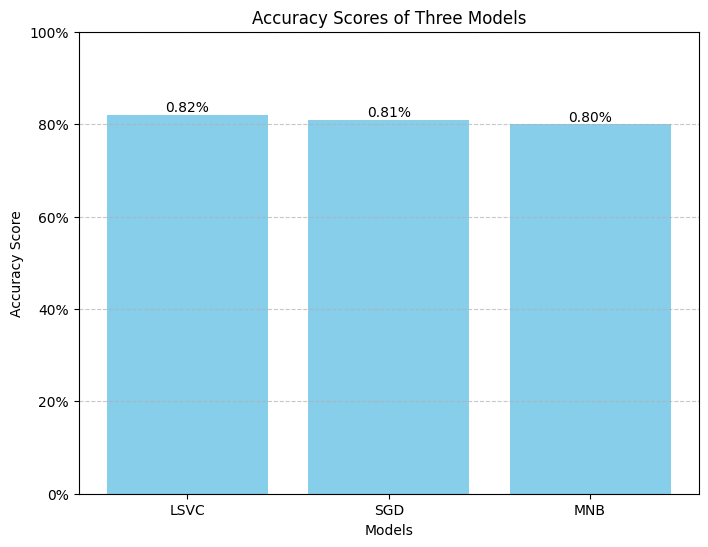

In [19]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models, scores, color='skyblue')
plt.title('Accuracy Scores of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}%', 
             ha='center', va='bottom', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
text = ['Manual Book']
text[0] = text[0].lower()
text_transform = (vectorizer.transform(text))

In [21]:
lsvc_predict = (lsvc.predict(text_transform))
sgd_predict = (sgd.predict(text_transform))
mnb_predict = (mnb.predict(text_transform))

In [22]:
print("LSVC: " + le.inverse_transform(lsvc_predict)[0])
print("SGD: " + le.inverse_transform(sgd_predict)[0])
print("MNB: " + le.inverse_transform(mnb_predict)[0])

LSVC: Reference
SGD: Engineering & Transportation
MNB: Engineering & Transportation


In [23]:
dump(le, 'label.pkl')
dump(vectorizer, 'vectorizer.pkl')
dump(lsvc, 'model.pkl')
print("Model Saved")

Model Saved
